# **제주 상권분석을 통한 수익 극대화 비즈니스 인사이트 도출**




# 1. 분석의 목적

 제주도 상권을 분석하고, 재난지원금 사용기간 동안 총매출과 지원금 사용액을 비교하여 매출에 미친 영향을 분석, 해당 상권별 부동산 가치를 도출한다. 상권별 임대료를 기준으로 대표적인 부동산을 추출하고, 과거 해당 부동산의 매매, 임대 추이를 통해 부동산 매입, 임대하는 경우와 임차인으로서 장사를 하는 경우의 이익을 비교한다. 결과적으로, 최종 분석을 통해 이익을 극대화할 비즈니스 모델을 만들어 보려 한다.

# 2. 가설 설정
1. 임대료가 높을수록 도심지역에 위치할 것이다.
2. 주요 도심 상권의 상가 순영업소득이 높을 것이다.
3. 도심지역 거주민의 월평균 소득이 높을 것이다.
4. 도심지역, 상권형성 지역의 거주자 수가 많을 것이다.
5. 상권이 형성된 도심지역의 부동산 가치가 높을 것이다.
6. 음식점 및 식자재의 대체 업종인 편의점의 수요도 높았을 것이다 (집합금지)
6. (1~6 모두 제주도 내의 타 지역 대비 도심지역을 기준으로 한다.)

# 3. 재난지원금의 특성

- 사용처의 제한 (영세, 소상공인 업체 위주 사용)
- 사용자의 자격 제한 (내, 외국인 구분)
- 금액 제한 (지역, 자격별 수령 금액 차이)

==> 제주도 재난지원금은 외국인에게도 지급하였으므로, 내외국인 모두 포함하여 분석하였다. 그리고, 우리나라 소상공인 대부분이 음식점업에 종사하고 있고, 인간의 삶을 유지하는 데 필수 요소인 의식주 중 가장 필수적인 요소는 '식(食, Food)'이기 때문에, 업종을 음식점 및 식자재로 Narrow Targeting하여 분석하였다. (슈퍼마켓은 소상공인 부동산 거래와 관련성이 낮기 때문에 제외)

# 4. 살펴볼 사항

1. 재난지원금 사용 양상 (업종별, 제주지역별 5,6,7,8월)
2. 임대료 (제주상권별)
3. 상가 권리금 현황 (전국, 제주)
4. 상가(부동산) 순영업소득 (제주상권별)
5. 월평균 소득 (제주지역별)
6. 인구수 (제주 행정시,읍면동별)

# 5. 비즈니스 인사이트 도출
1. 추가 예정
2. 추가 예정

---
# Ⅰ. 분석 준비

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")

1) 5~8월 각 월별 데이터 살펴보기

In [3]:
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dayconEDA/KRI-DAC_Jeju_data5.txt')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273183 entries, 0 to 273182
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OBJECTID       273183 non-null  int64  
 1   Field1         273183 non-null  int64  
 2   YM             273183 non-null  int64  
 3   SIDO           273183 non-null  object 
 4   SIGUNGU        273183 non-null  object 
 5   FranClass      273183 non-null  object 
 6   Type           273183 non-null  object 
 7   Time           273183 non-null  object 
 8   TotalSpent     273183 non-null  int64  
 9   DisSpent       273183 non-null  int64  
 10  NumofSpent     273183 non-null  int64  
 11  NumofDisSpent  273183 non-null  int64  
 12  POINT_X        273183 non-null  float64
 13  POINT_Y        273183 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 29.2+ MB


In [4]:
df6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dayconEDA/KRI-DAC_Jeju_data6.txt')
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281896 entries, 0 to 281895
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OBJECTID       281896 non-null  int64  
 1   Field1         281896 non-null  int64  
 2   YM             281896 non-null  int64  
 3   SIDO           281896 non-null  object 
 4   SIGUNGU        281896 non-null  object 
 5   FranClass      281896 non-null  object 
 6   Type           281896 non-null  object 
 7   Time           281896 non-null  object 
 8   TotalSpent     281896 non-null  int64  
 9   DisSpent       281896 non-null  int64  
 10  NumofSpent     281896 non-null  int64  
 11  NumofDisSpent  281896 non-null  int64  
 12  POINT_X        281896 non-null  float64
 13  POINT_Y        281896 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 30.1+ MB


In [5]:
df7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dayconEDA/KRI-DAC_Jeju_data7.txt')
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284265 entries, 0 to 284264
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OBJECTID       284265 non-null  int64  
 1   Field1         284265 non-null  int64  
 2   YM             284265 non-null  int64  
 3   SIDO           284265 non-null  object 
 4   SIGUNGU        284265 non-null  object 
 5   X              284265 non-null  int64  
 6   Y              284265 non-null  int64  
 7   FranClass      284265 non-null  object 
 8   Type           284265 non-null  object 
 9   Time           284265 non-null  object 
 10  TotalSpent     284265 non-null  int64  
 11  DisSpent       284265 non-null  int64  
 12  NumofSpent     284265 non-null  int64  
 13  NumofDisSpent  284265 non-null  int64  
 14  POINT_X        284265 non-null  float64
 15  POINT_Y        284265 non-null  float64
dtypes: float64(2), int64(9), object(5)
memory usage: 34.7+ MB


In [6]:
df8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dayconEDA/KRI-DAC_Jeju_data8.txt')
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280085 entries, 0 to 280084
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OBJECTID       280085 non-null  int64  
 1   Field1         280085 non-null  int64  
 2   YM             280085 non-null  int64  
 3   SIDO           280085 non-null  object 
 4   SIGUNGU        280085 non-null  object 
 5   FranClass      280085 non-null  object 
 6   Type           280085 non-null  object 
 7   Time           280085 non-null  object 
 8   TotalSpent     280085 non-null  int64  
 9   DisSpent       280085 non-null  int64  
 10  NumofSpent     280085 non-null  int64  
 11  NumofDisSpent  280085 non-null  int64  
 12  POINT_X        280085 non-null  float64
 13  POINT_Y        280085 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 29.9+ MB


2) 5~8월 데이터를 하나의 파일로 합치기

In [7]:
mergedf = pd.concat([df5,df6,df7,df8])
mergedf.count()

OBJECTID         1119429
Field1           1119429
YM               1119429
SIDO             1119429
SIGUNGU          1119429
FranClass        1119429
Type             1119429
Time             1119429
TotalSpent       1119429
DisSpent         1119429
NumofSpent       1119429
NumofDisSpent    1119429
POINT_X          1119429
POINT_Y          1119429
X                 284265
Y                 284265
dtype: int64

In [8]:
mergedf.head()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,X,Y
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06,NaN,NaN
1,2,2,202005,제주특별자치도,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06,NaN,NaN
2,3,3,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06,NaN,NaN
3,4,4,202005,제주특별자치도,제주시,영세,편의점,00시,46600,0,2,0,877055.9593,1.479766e+06,NaN,NaN
4,5,5,202005,제주특별자치도,제주시,영세,주점,00시,66000,0,2,0,877055.4817,1.479866e+06,NaN,NaN


In [9]:
mergedf.tail()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,X,Y
280080,280081,280081,202008,제주특별자치도,제주시,영세,편의점,x시,13700,0,2,0,950266.5976,1.502458e+06,NaN,NaN
280081,280082,280082,202008,제주특별자치도,제주시,영세,일반한식,x시,56000,0,1,0,950317.5379,1.502258e+06,NaN,NaN
280082,280083,280083,202008,제주특별자치도,제주시,영세,일반한식,x시,28000,0,1,0,950469.1585,1.501909e+06,NaN,NaN
280083,280084,280084,202008,제주특별자치도,제주시,중소1,중국음식,x시,46000,0,3,0,950574.6388,1.500760e+06,NaN,NaN
280084,280085,280085,202008,제주특별자치도,제주시,영세,서양음식,x시,9000,0,1,0,950565.5176,1.502659e+06,NaN,NaN


3) 불필요한 컬럼 제거

In [10]:
mergedf.drop(columns = ['X', 'Y', 'OBJECTID', 'Field1', 'Time', 'NumofSpent', 'NumofDisSpent'], inplace = True)

In [11]:
mergedf.head()

,YM,SIDO,SIGUNGU,FranClass,Type,TotalSpent,DisSpent,POINT_X,POINT_Y
0,202005,제주특별자치도,제주시,영세,일반한식,363000,66500,877005.9834,1.479766e+06
1,202005,제주특별자치도,제주시,영세,단란주점,1180000,0,877005.7447,1.479816e+06
2,202005,제주특별자치도,제주시,중소1,편의점,157670,6850,877056.6756,1.479616e+06
3,202005,제주특별자치도,제주시,영세,편의점,46600,0,877055.9593,1.479766e+06
4,202005,제주특별자치도,제주시,영세,주점,66000,0,877055.4817,1.479866e+06


4) 빈 값이 있는지 찾고, 0으로 대체 --> 애초에 데이터에 null 값 없음

In [46]:
mergedf.isnull().sum()

YM            0
SIDO          0
SIGUNGU       0
FranClass     0
Type          0
TotalSpent    0
DisSpent      0
POINT_X       0
POINT_Y       0
dtype: int64

5) 업종 항목 확인

In [13]:
mergedf['Type'].unique()

array(['일반한식', '단란주점', '편의점', '주점', '스넥', '서양음식', '일식회집', '기타음료식품', '노래방',
       '중국음식', '슈퍼마켓', '유흥주점', '기타숙박업', '기타레져업', '당구장', '농축수산품', '유아원',
       '골프경기장', '세탁소', '가방', '콘도', '주차장', '문화취미기타', '주유소', '사무서비스',
       '자동차정비', '특급호텔', '볼링장', '화장품', '기타회원제형태업소', '주류판매점', '제과점',
       '피부미용실', '약국', '칵테일바', '정육점', '독서실', '스포츠레져용품', '골프용품', 'LPG',
       '종합병원', '사우나', '화원', '의원', '안마스포츠마사지', '골프연습장', '2급호텔', '기타대인서비스',
       '보습학원', '부동산분양', '화물운송', '애완동물', '동물병원', '대형할인점', '인터넷Mall', '항공사',
       '헬스크럽', '기타유통업', '레져용품수리', '정장', '레져업소(회원제형태)', '관광여행', '1급호텔',
       '침구수예점', '사진관', '악세사리', '보관창고업', '기념품점', '미용원', '영화관', '의료용품',
       '세차장', '인터넷종합Mall', '기타잡화', '성인용품점', '상품권', '종합용역', '기계공구',
       '조세서비스', '택시', '기타의료기관및기기', '가례서비스', '구내매점', '수영장', '목재석재철물',
       '건축요업품', '기타업종', '렌트카', '종합레져타운', '유류판매', '농축협직영매장', '기타건축자재',
       '비료농약사료종자', '농기계', '보일러펌프', '가전제품', '스포츠의류', '페인트', '미곡상',
       '기타농업관련', '기타가구', '공공요금', '기능학원', '면세점', '기타교육', '위탁급식업', '이용원',
       '조명기구',

# Ⅱ. 재난지원금 사용 양상

1) 필요한 업종만 데이터 추출

In [14]:
m_data = pd.DataFrame(mergedf, columns=['YM', 'SIDO', 'SIGUNGU', 'FranClass', 'Type', 'TotalSpent', 'DisSpent', 'POINT_X', 'POINT_Y'])

targets = ['일반한식', '스넥', '서양음식', '일식회집', '기타음료식품', '중국음식', '농축수산품', '제과점', '정육점', '미곡상', '인삼제품', '홍삼제품']

f_data = m_data.loc[m_data['Type'].isin(targets)]

f_data.reset_index(drop=True, inplace=True)

f_data

,YM,SIDO,SIGUNGU,FranClass,Type,TotalSpent,DisSpent,POINT_X,POINT_Y
0,202005,제주특별자치도,제주시,영세,일반한식,363000,66500,877005.9834,1.479766e+06
1,202005,제주특별자치도,제주시,영세,스넥,159000,0,877205.4093,1.479867e+06
2,202005,제주특별자치도,제주시,영세,서양음식,26000,26000,877377.1167,1.485765e+06
3,202005,제주특별자치도,제주시,영세,스넥,53000,0,877430.4399,1.485066e+06
4,202005,제주특별자치도,제주시,영세,일식회집,112500,0,880563.8581,1.488229e+06
...,...,...,...,...,...,...,...,...,...
513476,202008,제주특별자치도,제주시,영세,일반한식,23500,0,950266.5976,1.502458e+06
513477,202008,제주특별자치도,제주시,영세,일반한식,56000,0,950317.5379,1.502258e+06
513478,202008,제주특별자치도,제주시,영세,일반한식,28000,0,950469.1585,1.501909e+06
513479,202008,제주특별자치도,제주시,중소1,중국음식,46000,0,950574.6388,1.500760e+06


In [15]:
f_data['Type'].unique()

array(['일반한식', '스넥', '서양음식', '일식회집', '기타음료식품', '중국음식', '농축수산품', '제과점',
       '정육점', '미곡상', '인삼제품', '홍삼제품'], dtype=object)

2) 업종별 매출액

In [16]:
sum_type = f_data.groupby(['Type']).TotalSpent.sum().sort_values(ascending=False)
sum_type

Type
일반한식      119782556296
서양음식       26851921875
농축수산품      14860792092
일식회집       10507137262
스넥          8506437042
제과점         7290420946
기타음료식품      6079529836
정육점         5825063389
중국음식        5725268161
홍삼제품         421863850
미곡상          158408230
인삼제품           6021500
Name: TotalSpent, dtype: int64

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

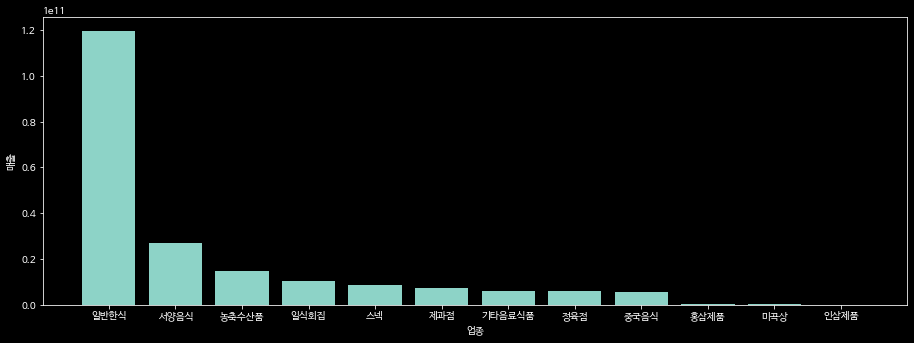

In [20]:
plt.rc('font', family='NanumBarunGothic') 

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
x = sum_type.index.values
y = sum_type.values
ax.bar(x,y)
plt.style.use('dark_background')
plt.xlabel('업종')
plt.ylabel('매출')
plt.show()

3) 업종별 재난지원금 사용액

In [21]:
sum_type2 = f_data.groupby(['Type']).DisSpent.sum().sort_values(ascending=False)
sum_type2

Type
일반한식      6026486130
서양음식      1006835289
농축수산품      736762439
스넥         549465856
정육점        525556644
일식회집       464192901
제과점        425278927
중국음식       378510089
기타음료식품     289054636
홍삼제품        58593413
미곡상         17217510
인삼제품          599660
Name: DisSpent, dtype: int64

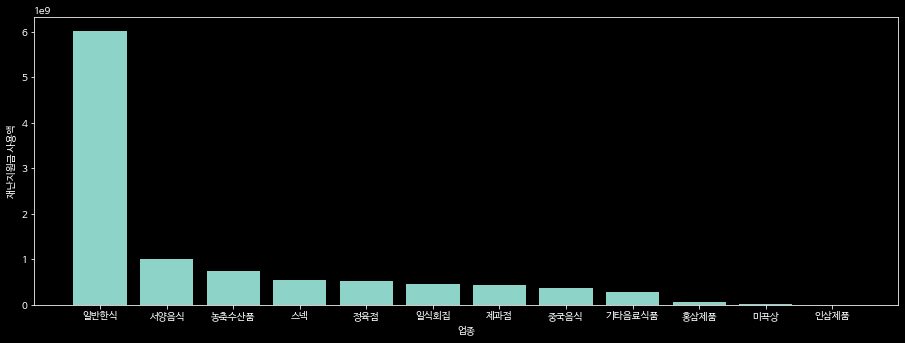

In [22]:
plt.rc('font', family='NanumBarunGothic') 

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
x = sum_type2.index.values
y = sum_type2.values
ax.bar(x,y)
plt.style.use('dark_background')
plt.xlabel('업종')
plt.ylabel('재난지원금 사용액')
plt.show()

#### 음식점 및 식자재 업종만 추출하여 해당 업종의 분류별 매출과 재난지원금을 살펴보았다.
#### ==> 그 결과, 매출이 압도적으로 높은 '일반한식'이 재난지원금 사용액도 압도적으로 높게 나타났음을 알 수 있다.  

4) 음식점의 대체재인 편의점 매출액

In [40]:
m_data = pd.DataFrame(mergedf, columns=['YM', 'SIDO', 'SIGUNGU', 'FranClass', 'Type', 'TotalSpent', 'DisSpent', 'POINT_X', 'POINT_Y'])

targets2 = ['일반한식', '서양음식', '농축수산품', '편의점', '구내매점']

f_data2 = m_data.loc[m_data['Type'].isin(targets2)]

f_data2.reset_index(drop=True, inplace=True)

f_data2

,YM,SIDO,SIGUNGU,FranClass,Type,TotalSpent,DisSpent,POINT_X,POINT_Y
0,202005,제주특별자치도,제주시,영세,일반한식,363000,66500,877005.9834,1.479766e+06
1,202005,제주특별자치도,제주시,중소1,편의점,157670,6850,877056.6756,1.479616e+06
2,202005,제주특별자치도,제주시,영세,편의점,46600,0,877055.9593,1.479766e+06
3,202005,제주특별자치도,제주시,영세,서양음식,26000,26000,877377.1167,1.485765e+06
4,202005,제주특별자치도,제주시,중소1,편의점,215910,34250,877430.6790,1.485016e+06
...,...,...,...,...,...,...,...,...,...
498327,202008,제주특별자치도,제주시,영세,일반한식,23500,0,950266.5976,1.502458e+06
498328,202008,제주특별자치도,제주시,영세,편의점,13700,0,950266.5976,1.502458e+06
498329,202008,제주특별자치도,제주시,영세,일반한식,56000,0,950317.5379,1.502258e+06
498330,202008,제주특별자치도,제주시,영세,일반한식,28000,0,950469.1585,1.501909e+06


In [41]:
f_data2['Type'].unique()

array(['일반한식', '편의점', '서양음식', '농축수산품', '구내매점'], dtype=object)

In [42]:
sum2_type = f_data2.groupby(['Type']).TotalSpent.sum().sort_values(ascending=False)
sum2_type

Type
일반한식     119782556296
편의점       39477932065
서양음식      26851921875
농축수산품     14860792092
구내매점        451357406
Name: TotalSpent, dtype: int64

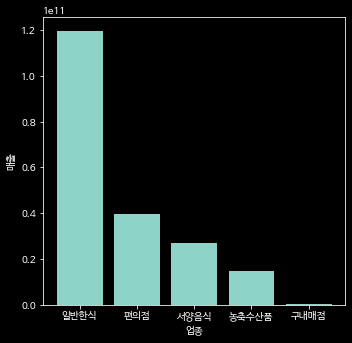

In [43]:
plt.rc('font', family='NanumBarunGothic') 

fig = plt.figure()
ax = fig.add_axes([0,0,0.7,1])
x = sum2_type.index.values
y = sum2_type.values
ax.bar(x,y)
plt.style.use('dark_background')
plt.xlabel('업종')
plt.ylabel('매출')
plt.show()

5) 편의점 재난지원금 사용액

In [44]:
sum2_type2 = f_data2.groupby(['Type']).DisSpent.sum().sort_values(ascending=False)
sum2_type2

Type
일반한식     6026486130
편의점      2022731930
서양음식     1006835289
농축수산품     736762439
구내매점       28458447
Name: DisSpent, dtype: int64

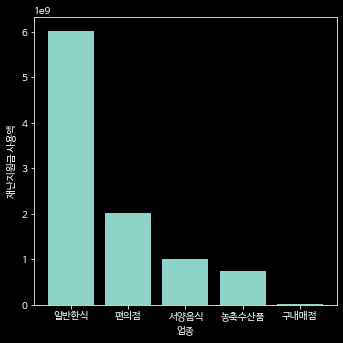

In [45]:
plt.rc('font', family='NanumBarunGothic') 

fig = plt.figure()
ax = fig.add_axes([0,0,0.7,1])
x = sum2_type2.index.values
y = sum2_type2.values
ax.bar(x,y)
plt.style.use('dark_background')
plt.xlabel('업종')
plt.ylabel('재난지원금 사용액')
plt.show()

#### 음식점 업종만 비교했을 시에는 매출과 재난지원금 사용액이 '일반한식' -> '서양음식' -> '농축수산품' 순으로 나타났다.
#### 집합금지로 인한 음식점 대체재인 편의점의 수요가 높았을 것이라 예측했는데, '일반한식' -> '편의점' -> '서양음식' -> '농축수산품' 순으로 나타나, 역시 편의점의 수요가 높았음을 알 수 있다. (이어서 '연령', '소득', '지역'과의 상관관계를 분석하면 해당 통계의 관계가 더욱 명확해질 것이다.)

#Ⅲ. 임대료 현황 (제주 상권별)

# Ⅳ. 상가 권리금 현황 (전국, 제주)

# Ⅴ. 상가(부동산) 순영업소득 (제주상권별)

# Ⅵ. 월평균 소득 (제주지역별)

# Ⅶ. 인구수 (제주 행정시,읍면동별)

# 최종 분석 결과

# 비즈니스 인사이트 도출